In [1]:
import pyart
from wsrlib import *
import matplotlib.pyplot as plt
import numpy as np


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
key = 'KBGM19951101_013245'

radar = read_s3(key, below_threshold_val=np.nan)

/Users/sheldon/opt/anaconda3/lib/python3.7/site-packages/pyart/io/common.py:87: UserWarning: Unexpected arguments: dict_keys(['below_threshold_val'])
  warnings.warn('Unexpected arguments: %s' % dic.keys())
/Users/sheldon/opt/anaconda3/lib/python3.7/site-packages/pyart/io/nexrad_level2.py:169: UserWarning: No MSG5 detected. Setting to meaningless data. Rethink your life choices and be ready for errors.Specifically fixed angle data will be missing
  warnings.warn("No MSG5 detected. Setting to meaningless data. "
/Users/sheldon/opt/anaconda3/lib/python3.7/site-packages/pyart/io/nexrad_archive.py:209: UserWarning: Gate spacing is not constant, interpolating data in scans [0, 2, 4, 5, 6, 7, 8, 9, 10] for moment REF.
  UserWarning)


In [3]:
data, elev, az, rng = radar2mat(radar)

466000.0


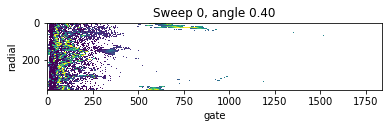

117000.0


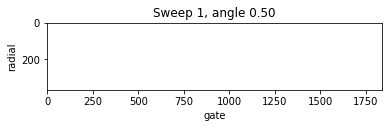

466000.0


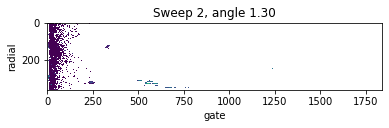

117000.0


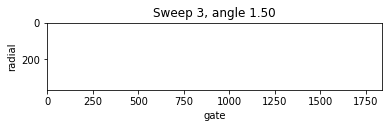

117000.0


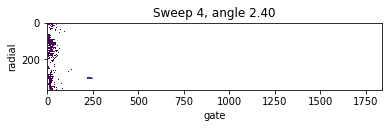

117000.0


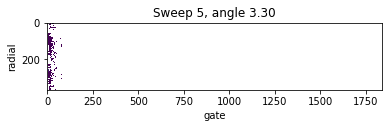

117000.0


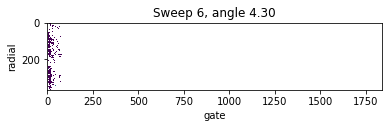

117000.0


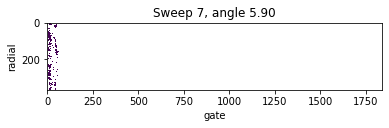

127000.0


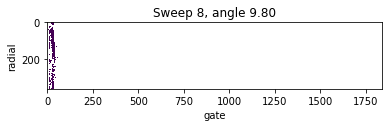

127000.0


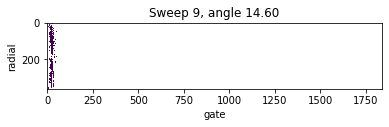

127000.0


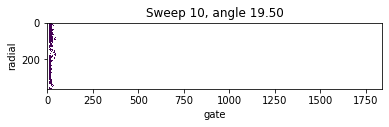

In [4]:
elevs = radar.fixed_angle['data']

for i, elev in enumerate(elevs):
    data = radar.get_field(i, 'reflectivity', copy=True)
    print(get_unambiguous_range(radar, i))
    data[np.isnan(data)] = -5
    data = np.ma.filled(data, fill_value=np.nan)
    plt.imshow(data, vmin=-5, vmax=35)
    
    angle = [i]
    plt.xlabel('gate')
    plt.ylabel('radial')
    plt.title(f'Sweep {i}, angle {elev:.2f}')
    plt.show()

In [19]:
radar.fields

{'spectrum_width': {'units': 'meters_per_second',
  'standard_name': 'doppler_spectrum_width',
  'long_name': 'Spectrum Width',
  'valid_max': 63.0,
  'valid_min': -63.5,
  'coordinates': 'elevation azimuth range',
  '_FillValue': -9999.0,
  'data': masked_array(
    data=[[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [nan, nan, nan, ..., --, --, --],
          [nan, nan, nan, ..., --, --, --],
          [nan, nan, nan, ..., --, --, --]],
    mask=[[ True,  True,  True, ...,  True,  True,  True],
          [ True,  True,  True, ...,  True,  True,  True],
          [ True,  True,  True, ...,  True,  True,  True],
          ...,
          [False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True],
          [False, False, False, ...,  True,  True,  True]],
    fill_value=1e+20,
    dtype=float32)},
 'reflectivity': {'units': 'dBZ',
  'standard_name':